In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
!pwd

/Users/jmbowma/Desktop/CO copy


In [2]:
# Read the data and store them in X and y
data = pd.read_csv("CO.txt", delim_whitespace=True, header=None)
xy_data = data.to_numpy()
X = xy_data[:,0].reshape((-1,1))
y = xy_data[:,1].reshape((-1,1))
print (X)
print (y)

[[1.6 ]
 [1.7 ]
 [1.8 ]
 [1.9 ]
 [2.  ]
 [2.1 ]
 [2.15]
 [2.2 ]
 [2.3 ]
 [2.5 ]
 [2.7 ]
 [2.9 ]
 [3.1 ]
 [3.3 ]
 [3.5 ]
 [3.7 ]
 [3.9 ]
 [4.1 ]
 [4.3 ]
 [4.5 ]
 [5.  ]]
[[-112.8173434]
 [-112.9755232]
 [-113.0777218]
 [-113.1397696]
 [-113.1731713]
 [-113.186311 ]
 [-113.1872665]
 [-113.1853124]
 [-113.174653 ]
 [-113.1365499]
 [-113.0888249]
 [-113.040112 ]
 [-112.9945608]
 [-112.9539327]
 [-112.9187699]
 [-112.8890178]
 [-112.8643389]
 [-112.8442656]
 [-112.8282707]
 [-112.8158038]
 [-112.7896999]]


In [3]:
# "Normalize" y to have a mean of 0 and standard deviation of 1
scaler = StandardScaler().fit(y)
y = scaler.transform(y).flatten()
y

array([ 1.313693  ,  0.19962993, -0.52015658, -0.95716031, -1.19240906,
       -1.28495219, -1.2916818 , -1.27791904, -1.2028447 , -0.9344839 ,
       -0.5983559 , -0.2552701 ,  0.06554779,  0.3516922 ,  0.59934441,
        0.80888896,  0.98270288,  1.12407948,  1.23673184,  1.32453643,
        1.50838665])

In [4]:
# Split the data set to training and testing;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52394)
print (X_train)
print (y_train)

[[3.7]
 [3.3]
 [2.7]
 [1.6]
 [2.5]
 [2.2]
 [4.3]
 [3.1]
 [4.5]
 [5. ]
 [1.7]
 [2.9]
 [4.1]
 [1.9]
 [2. ]]
[ 0.80888896  0.3516922  -0.5983559   1.313693   -0.9344839  -1.27791904
  1.23673184  0.06554779  1.32453643  1.50838665  0.19962993 -0.2552701
  1.12407948 -0.95716031 -1.19240906]


In [5]:
# Create a NN regressor with 1 hidden layer and 5 neurons in the hidden layer, and then fit the model
regressor = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='lbfgs', random_state=63941)
regressor.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=5, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=63941, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [6]:
# Calculate the training and testing RMSE using the original scale (so inverse_transform is used here)
train_pred = scaler.inverse_transform(regressor.predict(X_train))
rmse = np.sqrt(np.mean(np.square(train_pred - scaler.inverse_transform(y_train))))
print("Training RMSE = ", rmse, " hartree")

test_pred = scaler.inverse_transform(regressor.predict(X_test))
rmse = np.sqrt(np.mean(np.square(test_pred - scaler.inverse_transform(y_test))))
print("Testing RMSE = ", rmse, " hartree")

Training RMSE =  0.002825475013930612  hartree
Testing RMSE =  0.0021819288065499545  hartree


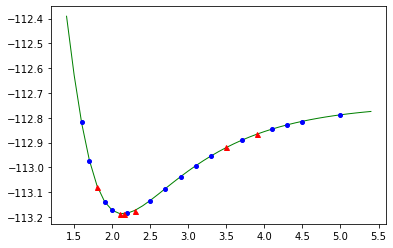

In [7]:
# plot the potential from the NN fit and compare it to original data
X_plt = np.arange(1.4, 5.5, 0.1).reshape((-1,1))
y_plt = scaler.inverse_transform(regressor.predict(X_plt))
plt.plot(X_plt, y_plt, "g", linewidth=1)                                 # NN prediction as a green line
plt.plot(X_train, scaler.inverse_transform(y_train), "bo", markersize=4) # original training data as blue circle
plt.plot(X_test, scaler.inverse_transform(y_test), "r^", markersize=5)   # original testing data as red triangle

In [16]:
# print the optimized weights and biases
print(regressor.coefs_) # weights
print(regressor.intercepts_) # biases

[array([[ 2.26213284,  2.60631926, -1.15438119,  3.55103431, -0.53803466]]), array([[-6.98246955],
       [ 1.00500386],
       [-1.87384687],
       [ 2.01676305],
       [-4.6371651 ]])]
[array([-3.23903165,  2.24023194, -1.68567945,  0.63672862,  0.93460533]), array([-0.75550194])]


In [8]:
#redo using data in eV
# Read the data and store them in X and y
data = pd.read_csv("COeV.txt", delim_whitespace=True, header=None)
xy_data = data.to_numpy()
X = xy_data[:,0].reshape((-1,1))
y = xy_data[:,1].reshape((-1,1))
print (X)
print (y)

[[1.6 ]
 [1.7 ]
 [1.8 ]
 [1.9 ]
 [2.  ]
 [2.1 ]
 [2.15]
 [2.2 ]
 [2.3 ]
 [2.5 ]
 [2.7 ]
 [2.9 ]
 [3.1 ]
 [3.3 ]
 [3.5 ]
 [3.7 ]
 [3.9 ]
 [4.1 ]
 [4.3 ]
 [4.5 ]
 [5.  ]]
[[10.06602]
 [ 5.76167]
 [ 2.98075]
 [ 1.29227]
 [ 0.38336]
 [ 0.02586]
 [ 0.     ]
 [ 0.05305]
 [ 0.34308]
 [ 1.37988]
 [ 2.67868]
 [ 4.00406]
 [ 5.24369]
 [ 6.34921]
 [ 7.30607]
 [ 8.11575]
 [ 8.78716]
 [ 9.33337]
 [ 9.76873]
 [10.10796]
 [10.81819]]


In [11]:
# "Normalize" y to have a mean of 0 and standard deviation of 1
scaler = StandardScaler().fit(y)
y = scaler.transform(y).flatten()
y

array([ 1.3136932 ,  0.19961904, -0.52015307, -0.95717421, -1.192423  ,
       -1.28495301, -1.29164622, -1.27791555, -1.20284848, -0.93449854,
       -0.5983364 , -0.25529468,  0.06555278,  0.35168919,  0.59934865,
        0.80891422,  0.98269203,  1.12406493,  1.23674706,  1.32454833,
        1.50837373])

In [12]:
# Split the data set to training and testing;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52394)
print (X_train)
print (y_train)

[[3.7]
 [3.3]
 [2.7]
 [1.6]
 [2.5]
 [2.2]
 [4.3]
 [3.1]
 [4.5]
 [5. ]
 [1.7]
 [2.9]
 [4.1]
 [1.9]
 [2. ]]
[ 0.80891422  0.35168919 -0.5983364   1.3136932  -0.93449854 -1.27791555
  1.23674706  0.06555278  1.32454833  1.50837373  0.19961904 -0.25529468
  1.12406493 -0.95717421 -1.192423  ]


In [13]:
#use same NN but re-train
regressor.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=5, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=63941, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
# Calculate the training and testing RMSE using the original scale (so inverse_transform is used here)
train_pred = scaler.inverse_transform(regressor.predict(X_train))
rmse = np.sqrt(np.mean(np.square(train_pred - scaler.inverse_transform(y_train))))
print("Training RMSE = ", rmse, " eV")

test_pred = scaler.inverse_transform(regressor.predict(X_test))
rmse = np.sqrt(np.mean(np.square(test_pred - scaler.inverse_transform(y_test))))
print("Testing RMSE = ", rmse, " eV")

Training RMSE =  0.0919241515633952  eV
Testing RMSE =  0.09645504304718325  eV


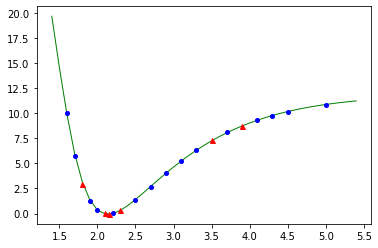

In [15]:
# plot the potential from the NN fit and compare it to original data
X_plt = np.arange(1.4, 5.5, 0.1).reshape((-1,1))
y_plt = scaler.inverse_transform(regressor.predict(X_plt))
plt.plot(X_plt, y_plt, "g", linewidth=1)                                 # NN prediction as a green line
plt.plot(X_train, scaler.inverse_transform(y_train), "bo", markersize=4) # original training data as blue circle
plt.plot(X_test, scaler.inverse_transform(y_test), "r^", markersize=5)   # original testing data as red triangle

In [17]:
# print the optimized weights and biases
print(regressor.coefs_) # weights
print(regressor.intercepts_) # biases

[array([[ 2.26213284,  2.60631926, -1.15438119,  3.55103431, -0.53803466]]), array([[-6.98246955],
       [ 1.00500386],
       [-1.87384687],
       [ 2.01676305],
       [-4.6371651 ]])]
[array([-3.23903165,  2.24023194, -1.68567945,  0.63672862,  0.93460533]), array([-0.75550194])]
